# K-NN Classification (Engineered)

This model is created to show the effects undersampling has on the accuracy score and confusion matrix of the K-NN model

# 1) Data Preprocessing

## Import Libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Import Dataset

In [34]:
dataset = pd.read_csv('C:/Users/LM/Desktop/NUS Documents/School Notes/Python/PythonCA/data.csv')

In [35]:
#Check on sample size of each class
target_count = dataset.diagnosis.value_counts()
print('Class B:', target_count[0])
print('Class M:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class B: 357
Class M: 212
Proportion: 1.68 : 1


## Perform Oversampling

In [36]:
df_class_0 = dataset[dataset.diagnosis == 'B']
df_class_1 = dataset[dataset.diagnosis == 'M']
df_class_1_over = df_class_1.sample(target_count[0], replace=True)
df_test_over = pd.concat([df_class_0,df_class_1_over], axis=0)
target_count = df_test_over.diagnosis.value_counts()
print('Class B:', target_count[0])
print('Class M:', target_count[1])

Class B: 357
Class M: 357


## Split into Features and Labels

In [37]:
x = df_test_over.iloc[:, 2:30].values
y = df_test_over.iloc[:, 1].values

## Perform Feature Scaling

In [38]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

## Perform PCA

In [39]:
pca = PCA(n_components=5)
pc = pca.fit_transform(x_scaled)

## Split into test and training dataset

In [40]:
x_train, x_test, y_train, y_test = train_test_split(pc, y, test_size=0.25, random_state=1)

## Check for k-value providing highest accuracy score

In [41]:
kVal = 0
maxAc = 0
for i in range(1, 30, 2):
    kClass = KNeighborsClassifier(n_neighbors=i)
    kClass.fit(x_train, y_train)
    ac = accuracy_score(y_test, kClass.predict(x_test))
    if ac > maxAc:
        maxAc = ac
        kVal = i
    else:
        pass
print(kVal)

1


# 2) Data Visualization

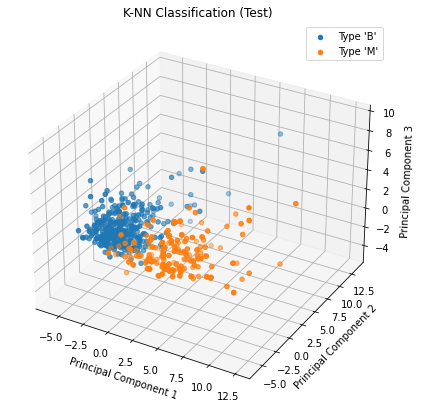

In [42]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

# Display only first 3 features
for i in np.unique(y):
    ax.scatter3D(xs=pc[y == i, 0],
                 ys=pc[y == i, 1],
                 zs=pc[y == i, 2],
                 label='Type ' + repr(i))

plt.title('K-NN Classification (Test)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.show()

# 3) Modelling

## Train K-NN model on dataset

In [43]:
# Time-check (Training start time)
train_start = time.time()

# Train K-NN Model on Training set
classifier = KNeighborsClassifier(n_neighbors=kVal)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [44]:
# Time-check (Training end time)
train_end = time.time()
print("Training duration =", train_end - train_start)

Training duration = 0.019031763076782227


## Predict test results using test dataset

In [45]:
# Time-check (Testing start time)
test_start = time.time()

# Predict Test set results
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'B']
 ['M' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']

In [46]:
# Time-check (Testing end time)
test_end = time.time()
print("Test duration =", test_end - test_start)

Test duration = 0.04647707939147949


# 4) Check Model Performance

## Compute Confusion matrix and Accuracy Score

In [47]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
ac = accuracy_score(y_test, y_pred)
print('Accuracy Score: ',ac)

[[79  5]
 [ 1 94]]
Accuracy Score:  0.9664804469273743


## Check Explained Variance Ratio

In [48]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.45210174 0.1948632  0.09087537 0.0692365  0.05267115]
0.8597479575205343
